The aim of this small Kazakhstani company is to optimize quantity of purchases and quantity of sales and day when the product will be ordered. I cleaned the given data, and analysed the correlation between features. 

In predicting the day of the order, I reduced the dimensionality (not neccessary) and used features that was correlated with target variable.

Being critical to myself, I have not used any 'cool data science tricks'. But, I want to play around with some high dimensional data to apply my knowledge that I gained in Machine Learning 2 course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [2]:
pd.set_option("max_rows", None)

In [3]:
data=pd.read_excel('C:/Users/Aspandiyar/Desktop/KZ project/main_data.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 19 columns):
item                              297 non-null object
Date of the purchase              297 non-null datetime64[ns]
quantity of purchase              297 non-null int64
exparation date                   297 non-null int64
period                            297 non-null object
store                             297 non-null object
adres                             297 non-null object
date of order                     297 non-null datetime64[ns]
date of shipment                  297 non-null datetime64[ns]
quantity                          297 non-null int64
price                             297 non-null int64
net worth                         297 non-null int64
quantity of returns               297 non-null int64
defect returns                    297 non-null int64
out of exparation date returns    297 non-null int64
cost of goods                     297 non-null int64
return costs    

In [5]:
data

,item,Date of the purchase,quantity of purchase,exparation date,period,store,adres,date of order,date of shipment,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,печенье упаковка маленькая,2020-01-03,13000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,печенье упаковка маленькая,2020-01-03,3000,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-04,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,печенье упаковка маленькая,2020-01-03,5000,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-03,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,печенье упаковка средняя,2020-01-03,6000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,печенье упаковка средняя,2020-01-03,500,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-03,450,80,36000,19,3,16,35100,38,862,1.915556
5,печенье упаковка средняя,2020-01-03,1500,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-04,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,печенье упаковка большая,2020-01-03,3000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,печенье упаковка большая,2020-01-03,150,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-03,140,115,16100,7,0,7,15820,14,266,1.900000
8,печенье упаковка большая,2020-01-03,400,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-04,400,115,46000,1,1,0,45200,2,798,1.995000
9,печенье упаковка маленькая,2020-02-02,14500,30,01.02.2020 - 01.03.2020,Магазин А,"ул. Калыка Акиева, 66",2020-02-05,2020-02-06,14250,51,726750,51,4,47,698250,102,28398,1.992842


# Predicting sales quantity

In [6]:
df=data.drop(['Date of the purchase','period','date of order','date of shipment'],axis=1)

In [7]:
# using labeel ecnoder only for item, adress, store
# converting nominals to numericals
from sklearn.preprocessing import LabelEncoder
x=['item', 'adres', 'store']
for i in x:
    a=LabelEncoder()
    df[i]=a.fit_transform(df[i])
df

,item,quantity of purchase,exparation date,store,adres,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,4,13000,30,2,40,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,4,3000,30,0,74,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,4,5000,30,1,0,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,5,6000,30,2,40,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,5,500,30,0,74,450,80,36000,19,3,16,35100,38,862,1.915556
5,5,1500,30,1,0,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,3,3000,30,2,40,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,3,150,30,0,74,140,115,16100,7,0,7,15820,14,266,1.900000
8,3,400,30,1,0,400,115,46000,1,1,0,45200,2,798,1.995000
9,4,14500,30,2,40,14250,51,726750,51,4,47,698250,102,28398,1.992842


#Normalization of data
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
df.iloc[:,5:14] = nscaler.fit_transform(df.iloc[:,5:14])
df.iloc[:,1:2] = nscaler.fit_transform(df.iloc[:,1:2])
df = df

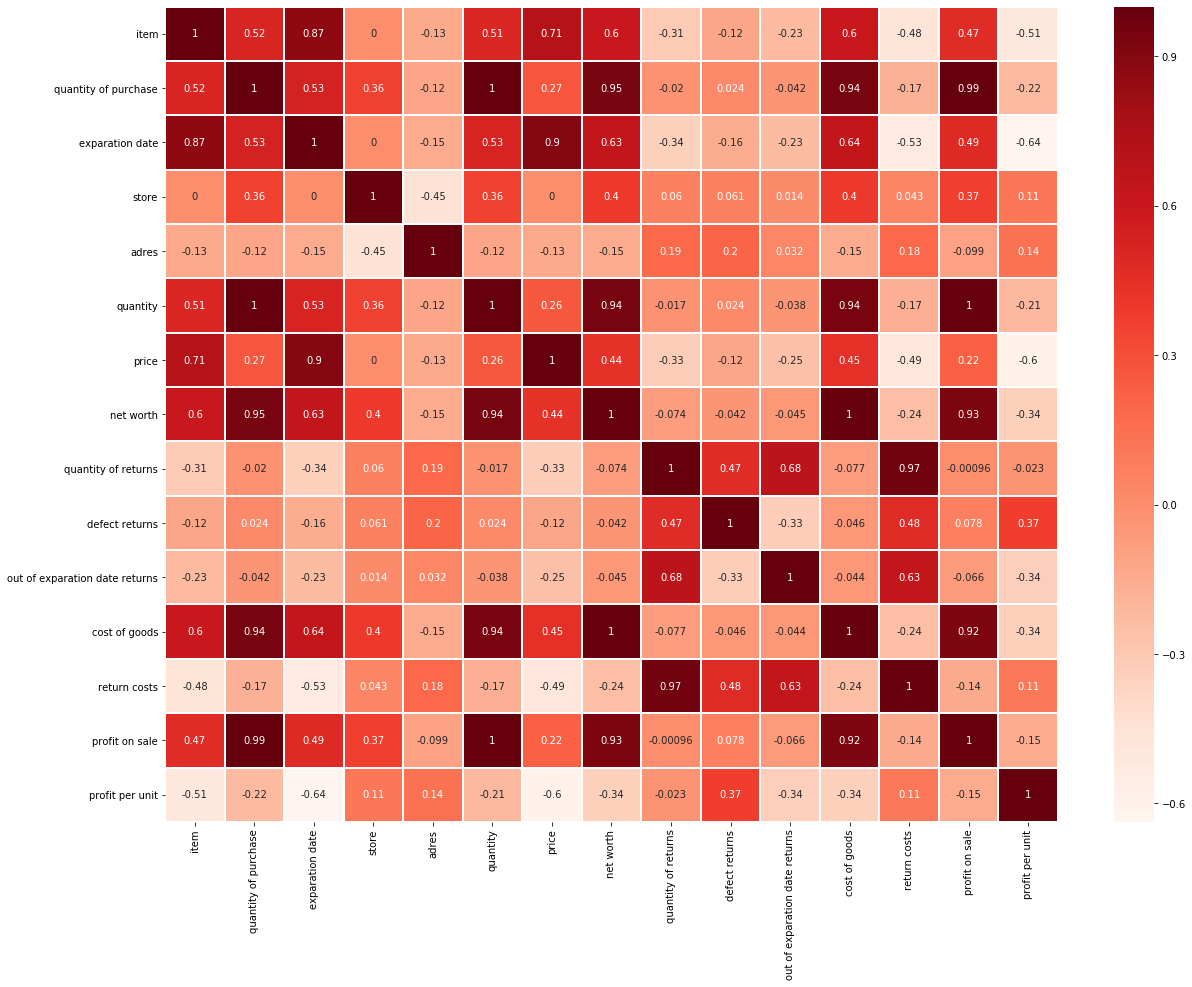

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True,linewidths=1, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable which threshold > 0.1
cor_target = abs(cor["quantity"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

item                    0.507090
quantity of purchase    0.998821
exparation date         0.525379
quantity                1.000000
net worth               0.943742
cost of goods           0.939697
profit on sale          0.996470
Name: quantity, dtype: float64

Text(0.5, 0, 'quantity')

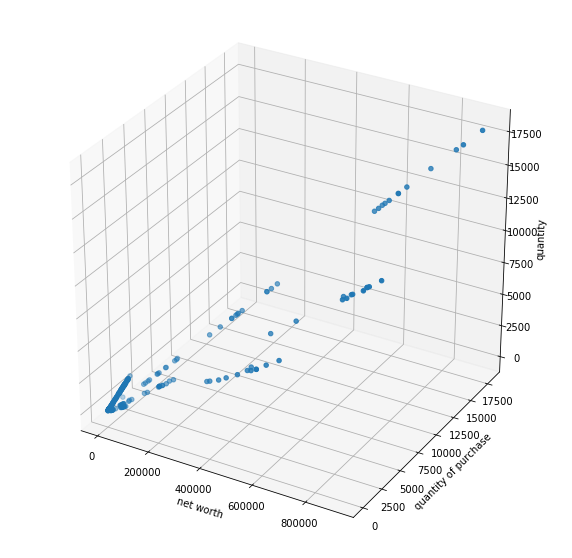

In [10]:
# graph the data
fig = plt.figure(1, figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['net worth'], df['quantity of purchase'], df['quantity'])
ax.set_xlabel('net worth')
ax.set_ylabel('quantity of purchase')
ax.set_zlabel('quantity')

In [11]:
df

,item,quantity of purchase,exparation date,store,adres,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,4,13000,30,2,40,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,4,3000,30,0,74,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,4,5000,30,1,0,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,5,6000,30,2,40,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,5,500,30,0,74,450,80,36000,19,3,16,35100,38,862,1.915556
5,5,1500,30,1,0,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,3,3000,30,2,40,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,3,150,30,0,74,140,115,16100,7,0,7,15820,14,266,1.900000
8,3,400,30,1,0,400,115,46000,1,1,0,45200,2,798,1.995000
9,4,14500,30,2,40,14250,51,726750,51,4,47,698250,102,28398,1.992842


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['item', 'adres','price', 'net worth',
       'quantity of returns', 'defect returns',
       'out of exparation date returns', 'cost of goods',
       'return costs', 'profit on sale',
       'profit per unit']], df['quantity'], test_size=0.3, random_state=3)

In [13]:
from sklearn.linear_model import LinearRegression,SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [14]:
drugTree = LinearRegression()
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

knn = RidgeCV()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

nbc = RandomForestRegressor()
nbc.fit(X_train,y_train)
y_pred = nbc.predict(X_test)



C:\Users\Aspandiyar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
predTree

array([ 9.20033358e+03,  8.10493404e+02,  7.94038730e+03,  1.77481626e+02,
        2.18090053e+03,  1.73399037e+03,  4.52511569e+02,  1.69489418e+01,
        2.00040148e+01,  1.48025161e+03,  7.68919640e+02,  8.60808573e+01,
        5.90939151e+00,  6.40138348e+01,  6.15051881e+03, -8.89631321e+00,
        5.96671359e+03,  2.04215485e+02,  6.37581111e+02,  3.95044907e+03,
        5.97834159e+03,  1.51339392e+03,  4.97445031e+02,  5.79695848e+01,
        1.39504789e+03,  2.15240018e+02,  1.00108082e+02,  3.45698235e+02,
        5.91495742e+01,  2.02877965e+03,  7.57866352e+01,  1.80411424e+03,
        2.36434837e+03,  1.72339219e+03,  1.24687151e+03,  1.24971726e+03,
        6.09851893e+01,  1.36089685e+03,  2.03815445e+03,  2.11372415e+03,
        2.59495117e+03,  2.07780258e+02,  1.41062825e+02,  3.83084610e+01,
        8.14517538e+03,  4.37165747e+02,  1.36882754e+02,  2.99170739e+03,
        5.71043845e+03,  5.45546403e+02,  2.63539842e+02,  1.24017239e+03,
        9.76331638e+01,  

In [16]:
print("LinearRegression's R-squared: ", r2_score(y_test, predTree))


print("RidgeCV's R_squared: ", r2_score(y_test, pred))


print("RandomForestRegressor's R_squared: ", r2_score(y_test, y_pred))




LinearRegression's R-squared:  0.9973209255419057
RidgeCV's R_squared:  0.9972865279669983
RandomForestRegressor's R_squared:  0.9934365362059041


In [17]:
df

,item,quantity of purchase,exparation date,store,adres,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,4,13000,30,2,40,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,4,3000,30,0,74,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,4,5000,30,1,0,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,5,6000,30,2,40,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,5,500,30,0,74,450,80,36000,19,3,16,35100,38,862,1.915556
5,5,1500,30,1,0,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,3,3000,30,2,40,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,3,150,30,0,74,140,115,16100,7,0,7,15820,14,266,1.900000
8,3,400,30,1,0,400,115,46000,1,1,0,45200,2,798,1.995000
9,4,14500,30,2,40,14250,51,726750,51,4,47,698250,102,28398,1.992842


# Predicting day of order

In [18]:
df.head()

,item,quantity of purchase,exparation date,store,adres,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,4,13000,30,2,40,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,4,3000,30,0,74,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,4,5000,30,1,0,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,5,6000,30,2,40,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,5,500,30,0,74,450,80,36000,19,3,16,35100,38,862,1.915556


In [19]:
data

,item,Date of the purchase,quantity of purchase,exparation date,period,store,adres,date of order,date of shipment,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,печенье упаковка маленькая,2020-01-03,13000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,печенье упаковка маленькая,2020-01-03,3000,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-04,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,печенье упаковка маленькая,2020-01-03,5000,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-03,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,печенье упаковка средняя,2020-01-03,6000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,печенье упаковка средняя,2020-01-03,500,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-03,450,80,36000,19,3,16,35100,38,862,1.915556
5,печенье упаковка средняя,2020-01-03,1500,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-04,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,печенье упаковка большая,2020-01-03,3000,30,03.01.2020 - 02.02.2020,Магазин А,"ул. Калыка Акиева, 66",2020-01-03,2020-01-04,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,печенье упаковка большая,2020-01-03,150,30,03.01.2020 - 02.02.2020,Магазин B,"​Курманжан Датка, 174",2020-01-03,2020-01-03,140,115,16100,7,0,7,15820,14,266,1.900000
8,печенье упаковка большая,2020-01-03,400,30,03.01.2020 - 02.02.2020,Магазин C,"Исы Ахунбаева, 137",2020-01-03,2020-01-04,400,115,46000,1,1,0,45200,2,798,1.995000
9,печенье упаковка маленькая,2020-02-02,14500,30,01.02.2020 - 01.03.2020,Магазин А,"ул. Калыка Акиева, 66",2020-02-05,2020-02-06,14250,51,726750,51,4,47,698250,102,28398,1.992842


In [20]:
df1 = data

In [21]:

# converting nominals to numericals
from sklearn.preprocessing import LabelEncoder
x=['item', 'adres', 'store']
for i in x:
    a=LabelEncoder()
    df1[i]=a.fit_transform(df1[i])
df1

,item,Date of the purchase,quantity of purchase,exparation date,period,store,adres,date of order,date of shipment,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit
0,4,2020-01-03,13000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,12700,51,647700,39,4,35,622300,78,25322,1.993858
1,4,2020-01-03,3000,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-04,2700,51,137700,16,1,15,132300,32,5368,1.988148
2,4,2020-01-03,5000,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-03,4900,51,249900,3,1,2,240100,6,9794,1.998776
3,5,2020-01-03,6000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,5700,80,456000,20,18,2,444600,40,11360,1.992982
4,5,2020-01-03,500,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-03,450,80,36000,19,3,16,35100,38,862,1.915556
5,5,2020-01-03,1500,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-04,1400,80,112000,7,6,1,109200,14,2786,1.990000
6,3,2020-01-03,3000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,2600,115,299000,23,14,9,293800,46,5154,1.982308
7,3,2020-01-03,150,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-03,140,115,16100,7,0,7,15820,14,266,1.900000
8,3,2020-01-03,400,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-04,400,115,46000,1,1,0,45200,2,798,1.995000
9,4,2020-02-02,14500,30,01.02.2020 - 01.03.2020,2,40,2020-02-05,2020-02-06,14250,51,726750,51,4,47,698250,102,28398,1.992842


In [22]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 19 columns):
item                              297 non-null int32
Date of the purchase              297 non-null datetime64[ns]
quantity of purchase              297 non-null int64
exparation date                   297 non-null int64
period                            297 non-null object
store                             297 non-null int32
adres                             297 non-null int32
date of order                     297 non-null datetime64[ns]
date of shipment                  297 non-null datetime64[ns]
quantity                          297 non-null int64
price                             297 non-null int64
net worth                         297 non-null int64
quantity of returns               297 non-null int64
defect returns                    297 non-null int64
out of exparation date returns    297 non-null int64
cost of goods                     297 non-null int64
return costs       

In [23]:

# Convert the data type of column 'DOB' from string (DD/MM/YYYY) to datetime64
df1['date of order'] = pd.to_datetime(df1['date of order'])

In [24]:
#transform date to day of the year
df1["day of purchase"] =  df1["Date of the purchase"].dt.dayofyear
df1["day of order"] =  df1["date of order"].dt.dayofyear

In [25]:
# Creating the new variables 
df1["days in shipment"] = (df1["date of shipment"] - df1["date of order"])/np.timedelta64(1,'D')

In [26]:
df1

,item,Date of the purchase,quantity of purchase,exparation date,period,store,adres,date of order,date of shipment,quantity,...,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit,day of purchase,day of order,days in shipment
0,4,2020-01-03,13000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,12700,...,39,4,35,622300,78,25322,1.993858,3,3,1.0
1,4,2020-01-03,3000,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-04,2700,...,16,1,15,132300,32,5368,1.988148,3,3,1.0
2,4,2020-01-03,5000,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-03,4900,...,3,1,2,240100,6,9794,1.998776,3,3,0.0
3,5,2020-01-03,6000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,5700,...,20,18,2,444600,40,11360,1.992982,3,3,1.0
4,5,2020-01-03,500,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-03,450,...,19,3,16,35100,38,862,1.915556,3,3,0.0
5,5,2020-01-03,1500,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-04,1400,...,7,6,1,109200,14,2786,1.990000,3,3,1.0
6,3,2020-01-03,3000,30,03.01.2020 - 02.02.2020,2,40,2020-01-03,2020-01-04,2600,...,23,14,9,293800,46,5154,1.982308,3,3,1.0
7,3,2020-01-03,150,30,03.01.2020 - 02.02.2020,0,74,2020-01-03,2020-01-03,140,...,7,0,7,15820,14,266,1.900000,3,3,0.0
8,3,2020-01-03,400,30,03.01.2020 - 02.02.2020,1,0,2020-01-03,2020-01-04,400,...,1,1,0,45200,2,798,1.995000,3,3,1.0
9,4,2020-02-02,14500,30,01.02.2020 - 01.03.2020,2,40,2020-02-05,2020-02-06,14250,...,51,4,47,698250,102,28398,1.992842,33,36,1.0


In [27]:
df1=data.drop(['Date of the purchase', 'period','date of order','date of shipment'],axis=1)
df1

,item,quantity of purchase,exparation date,store,adres,quantity,price,net worth,quantity of returns,defect returns,out of exparation date returns,cost of goods,return costs,profit on sale,profit per unit,day of purchase,day of order,days in shipment
0,4,13000,30,2,40,12700,51,647700,39,4,35,622300,78,25322,1.993858,3,3,1.0
1,4,3000,30,0,74,2700,51,137700,16,1,15,132300,32,5368,1.988148,3,3,1.0
2,4,5000,30,1,0,4900,51,249900,3,1,2,240100,6,9794,1.998776,3,3,0.0
3,5,6000,30,2,40,5700,80,456000,20,18,2,444600,40,11360,1.992982,3,3,1.0
4,5,500,30,0,74,450,80,36000,19,3,16,35100,38,862,1.915556,3,3,0.0
5,5,1500,30,1,0,1400,80,112000,7,6,1,109200,14,2786,1.990000,3,3,1.0
6,3,3000,30,2,40,2600,115,299000,23,14,9,293800,46,5154,1.982308,3,3,1.0
7,3,150,30,0,74,140,115,16100,7,0,7,15820,14,266,1.900000,3,3,0.0
8,3,400,30,1,0,400,115,46000,1,1,0,45200,2,798,1.995000,3,3,1.0
9,4,14500,30,2,40,14250,51,726750,51,4,47,698250,102,28398,1.992842,33,36,1.0


#Normalization of data
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
df1.iloc[:,5:15] = nscaler.fit_transform(df1.iloc[:,5:15])
df1 = df1

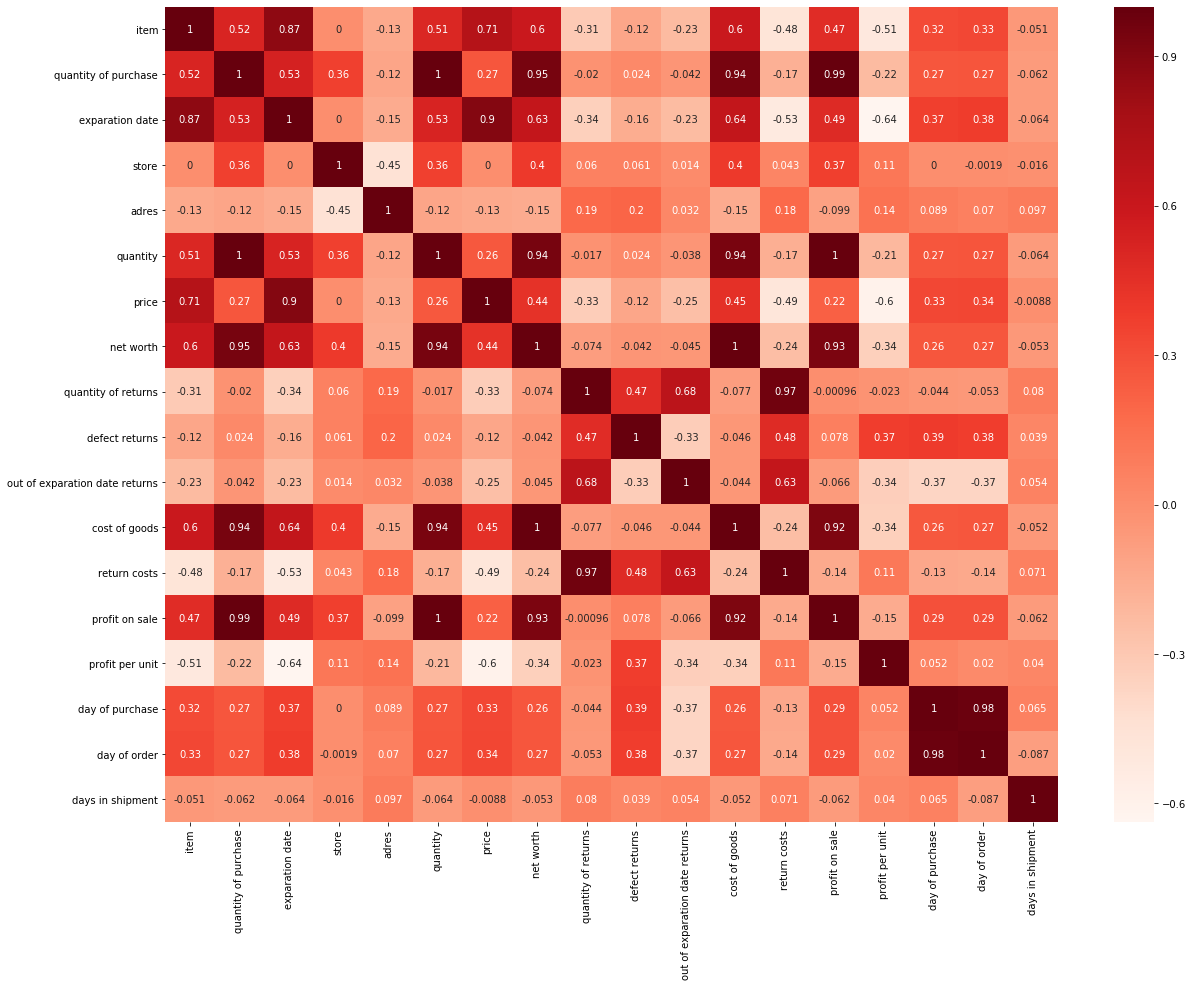

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Correlation with output variable which threshold > 0.3
cor_target = abs(cor["day of order"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

item                              0.334138
exparation date                   0.384307
price                             0.338491
defect returns                    0.378135
out of exparation date returns    0.370775
day of purchase                   0.983849
day of order                      1.000000
Name: day of order, dtype: float64

Text(0.5, 0, 'day of order')

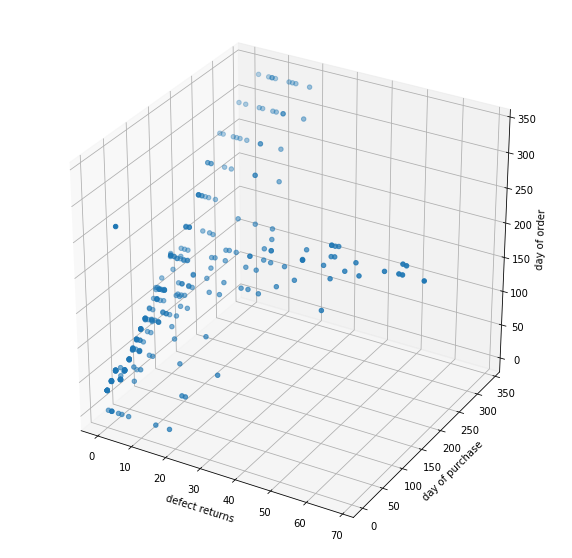

In [30]:
# graph the data
fig = plt.figure(1, figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['defect returns'], df1['day of purchase'], df1['day of order'])
ax.set_xlabel('defect returns')
ax.set_ylabel('day of purchase')
ax.set_zlabel('day of order')

In [31]:
X = df1.loc[:,['defect returns', 'day of purchase']]
y = df1.loc[:,['day of order']]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_test

(207, 2)
(207, 1)
(90, 2)
(90, 1)


,day of order
84,274
31,93
38,123
25,61
260,162
73,245
103,336
163,33
175,72
294,201


In [34]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 2 columns):
defect returns     297 non-null int64
day of purchase    297 non-null int64
dtypes: int64(2)
memory usage: 4.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 1 columns):
day of order    297 non-null int64
dtypes: int64(1)
memory usage: 2.4 KB
None


In [35]:
from sklearn.linear_model import LinearRegression,SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import xgboost as xgb

In [36]:
predTree

array([ 9.20033358e+03,  8.10493404e+02,  7.94038730e+03,  1.77481626e+02,
        2.18090053e+03,  1.73399037e+03,  4.52511569e+02,  1.69489418e+01,
        2.00040148e+01,  1.48025161e+03,  7.68919640e+02,  8.60808573e+01,
        5.90939151e+00,  6.40138348e+01,  6.15051881e+03, -8.89631321e+00,
        5.96671359e+03,  2.04215485e+02,  6.37581111e+02,  3.95044907e+03,
        5.97834159e+03,  1.51339392e+03,  4.97445031e+02,  5.79695848e+01,
        1.39504789e+03,  2.15240018e+02,  1.00108082e+02,  3.45698235e+02,
        5.91495742e+01,  2.02877965e+03,  7.57866352e+01,  1.80411424e+03,
        2.36434837e+03,  1.72339219e+03,  1.24687151e+03,  1.24971726e+03,
        6.09851893e+01,  1.36089685e+03,  2.03815445e+03,  2.11372415e+03,
        2.59495117e+03,  2.07780258e+02,  1.41062825e+02,  3.83084610e+01,
        8.14517538e+03,  4.37165747e+02,  1.36882754e+02,  2.99170739e+03,
        5.71043845e+03,  5.45546403e+02,  2.63539842e+02,  1.24017239e+03,
        9.76331638e+01,  

In [37]:
drugTree = LinearRegression()
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

knn = RidgeCV()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

nbc = RandomForestRegressor()
nbc.fit(X_train,y_train)
y_pred = nbc.predict(X_test)



C:\Users\Aspandiyar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [38]:
print("LinearRegression's R-squared: ", r2_score(y_test, predTree))


print("RidgeCV's R-squared: ", r2_score(y_test, pred))


print("RandomForestRegressor's R-squared: ", r2_score(y_test, y_pred))




LinearRegression's R-squared:  0.9867866939130343
RidgeCV's R-squared:  0.9867866781685709
RandomForestRegressor's R-squared:  0.9790222109846398
